In [1]:
import numpy as np
import matplotlib.pyplot as plt

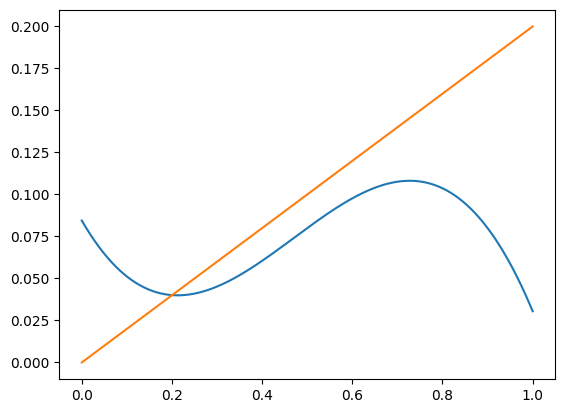

In [16]:
x = np.linspace(0,1,1000)
plt.plot(x,-(x-.01)*(x-0.5)*(x-.9)+.08)
plt.plot(x, .2*x)